# PROJET BIG DATA - BOUCHER AURELIEN - DUVAL QUENTIN
## Etude d'un DataSet sur les fusillades aux Etats-Unis

In [164]:
# Import des librairies utiles
import urllib.request
import pandas as pd
import datetime
from itertools import islice
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None) # Afficher toutes les colonnes (! pas les lignes)
sb.set(rc={'figure.figsize':(11.7,8.27)}) # Set d'une taille par défaut pour les chart

In [5]:
#Lecture du fichier csv et indication du séparateur
df_panda = pd.read_csv('../data/gun-violence-data_2.csv',sep=",")

In [6]:
df_panda.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [125]:
#Configuration des dates, Utilisation de la librairie pd.to_datetime
df_panda["date"]=pd.to_datetime(df_panda["date"],format="%Y-%m-%d") #conversion dans le format voulu
df_panda["year"]=df_panda["date"].apply(lambda time:time.year) # Gestion des années
df_panda["month"]=df_panda["date"].apply(lambda time:time.month)#Gestion des mois
df_panda["day"]=df_panda["date"].apply(lambda time:time.day)# Gestion des jours
df_panda["week_day"]=df_panda["date"].apply(lambda time:time.dayofweek)#Jour de la semaine
#Mappage des jours en brut
day_map = {0:'Lundi',1:'Mardi',2:'Mercredi',3:'Jeudi',4:'Vendredi',5:'Samedi',6:'Dimanche'}
df_panda["week_day"]=df_panda["week_day"].map(day_map)# Liaison avec le dictionnaire

In [127]:
df_killed = df_panda[['n_killed','year']].groupby('year').count().sort_values(by='n_killed')
df_killed.reset_index(0,inplace=True)
df_killed.head() # Groupement des morts par année

,year,n_killed
0,2013,278
1,2018,13802
2,2014,51854
3,2015,53579
4,2016,58763


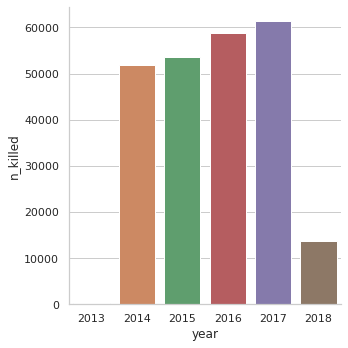

In [80]:
ibm = sb.catplot(x="year",y="n_killed", data=df_killed, kind='bar') #Représentation des morts par an

#### Nombre de morts par an aux USA depuis 2013. (Absence d'assez de données pour 2013 et 2018)

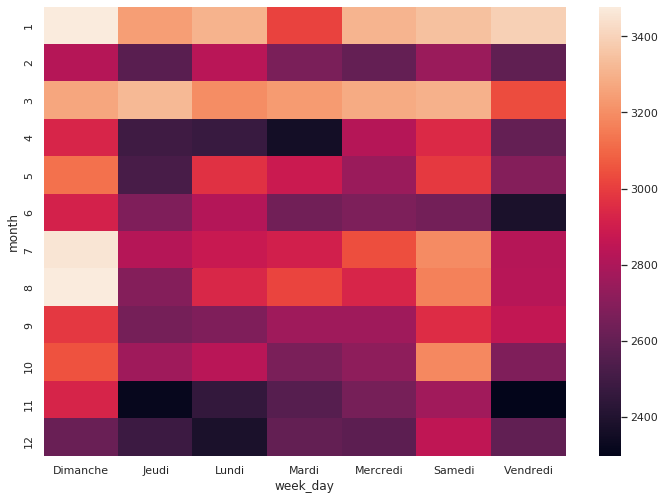

In [166]:
#Mise en relation des jours et des mois dans un heatmap en fonction de toutes les fusillades
heatmapByDayAndMonth=df_panda.groupby(["month","week_day"]).count()["incident_id"].unstack()
sb.heatmap(heatmapByDayAndMonth)

#### Heatmap représentant les jours où il y a le plus d'attaques. Ici Dimanche.

In [134]:
data = df_panda.loc[:, ['state', 'n_killed','n_injured']] #Selection des données pour le prochain traitemetn
#Groupement des fusillades par l'état et tri (des morts) par valeur décroissante
df_killed_injured = data[['n_killed','state']].groupby('state').count().sort_values(by='n_killed',ascending=False)
df_killed_injured.reset_index(0,inplace=True)# Mise de l'index en colonne 
df_killed_injured.head()

,state,n_killed
0,Illinois,17556
1,California,16306
2,Florida,15029
3,Texas,13577
4,Ohio,10244


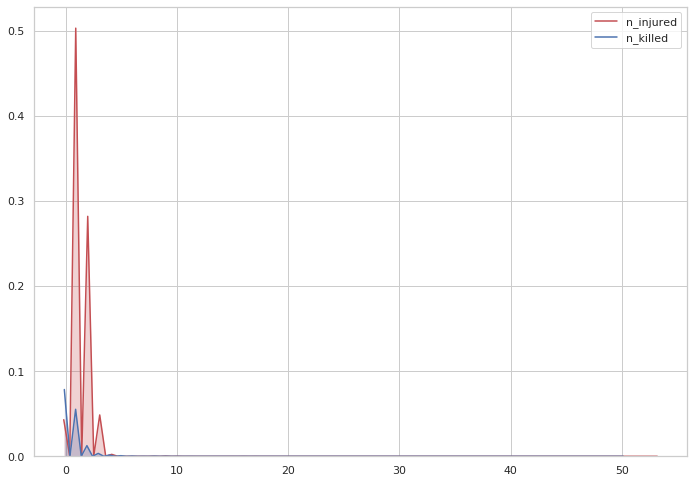

In [136]:
inj_kill_weektotal = df_panda[["n_injured","n_killed"]].groupby(df_panda["year"]).sum() #Groupement par année
dp_inj_kill_plot=sb.kdeplot(df_panda['n_injured'], shade=True, color="r")
dp_inj_kill_plot=sb.kdeplot(df_panda['n_killed'], shade=True, color="b")
del(inj_kill_weektotal) # Affichage des 2 courbes sur le même graph

#### Comparaison entre le nombre de personnes blessées et le nombre de personnes tuées en fonction des années

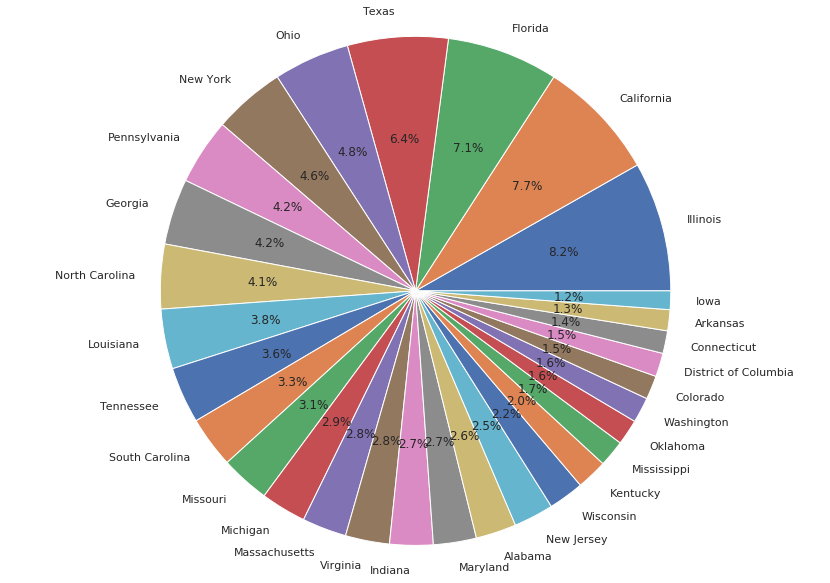

In [138]:
fig1, ax1 = plt.subplots()
df_killed_injured = df_killed_injured[:30] # Selection des trente état les plus meurtrier pour ne pas surcharger
#Représentation du nombre de morts en fonction des différents etat, ajout du pourcentage de répartisation
ax1.pie(df_killed_injured["n_killed"],labels=df_killed_injured["state"], autopct='%1.1f%%')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

#### TOP 30 des Etats ayant le plus de morts

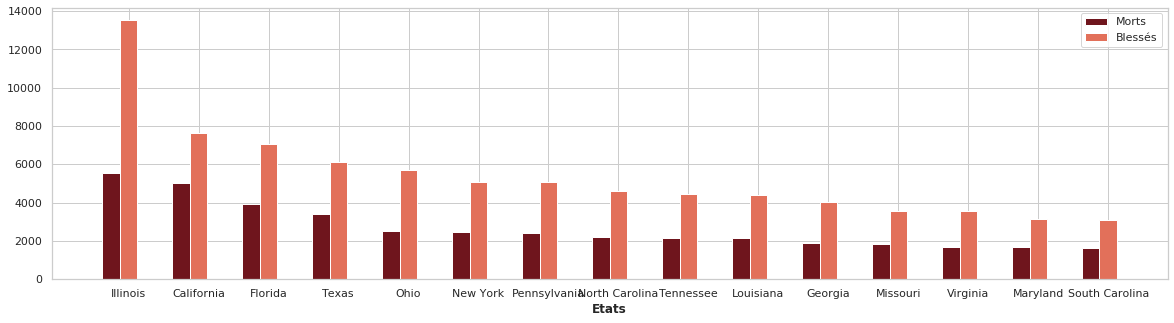

In [145]:
data = df_panda.loc[:, ['state', 'n_killed','n_injured']]# Prise des données pour le prochain graph

# Groupement des morts et des blessés en fonction de l'état et de manière décroissante
df_killed_bar = data[['n_killed','state']].groupby('state').sum().sort_values(by='n_killed',ascending=False)
df_injured_bar = data[['n_injured','state']].groupby('state').sum().sort_values(by='n_injured',ascending=False)
#Mise en place des index dans le chart (pour affficher les etats)
df_killed_bar.reset_index(0,inplace=True)
df_injured_bar.reset_index(0,inplace=True)
#Prise du TOP 15 des etats, pour ne pas trop surcharger
df_killed_bar = df_killed_bar[:15]
df_injured_bar = df_injured_bar[:15]

barWidth = 0.25 #largeur bar
r1 = np.arange(len(df_killed_bar.n_killed))# Espacement entre les bar (vu sur doc)
r2 = np.arange(len(df_injured_bar.n_injured))# Espacement entre les bar (vu sur doc)
r2_bis = [x + barWidth for x in r2]# Espacement entre les bar (vu sur doc)

plt.figure(figsize=(20,5))# Taille perso, meilleur affichage

#Chart des 2 graphs de manière séparé
plt.bar(r1, df_killed_bar.n_killed, color='#6f151d', width=barWidth, edgecolor='white', label='Morts')
plt.bar(r2_bis, df_injured_bar.n_injured, color='#e2705a', width=barWidth, edgecolor='white', label='Blessés')

#Réunification
plt.xlabel('Etats', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(df_injured_bar.state))], df_injured_bar.state)
plt.legend()
plt.show()

#### Comparaison entre les morts et les blessés pour les états les plus touchées. (TOP 15)

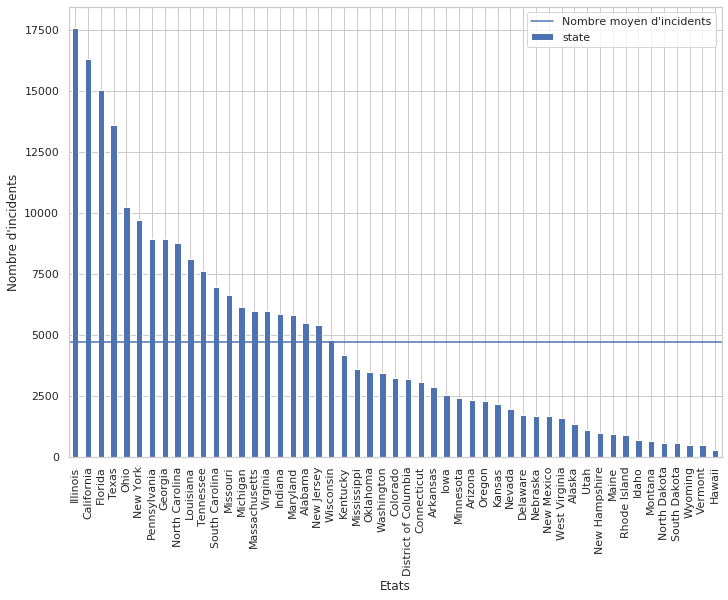

In [147]:
# COunt de tous les incidents et mise sous un plot
plot = df_panda.state.value_counts().plot(kind='bar')
plot.set_xlabel('Etats') #abscisse Label
plot.set_ylabel('Nombre d\'incidents')# Ordonnée Label
# Affichage d'une barre pour pour représenter les valeurs moyennes (vu sur doc)
mean_line = plot.axhline(df_panda.state.value_counts().mean(), color='b',label='Nombre moyen d\'incidents')
plt.legend()

#### Même représentation ici, mais sur le nombre d'incidents et la moyenne de ceux-ci.

In [148]:
'''
Le Formatage des données dans le dataset était assez mal fait donc:
Fonction permettant de boucler 
sur tous les "||" et de supprimer les doubles ":" 
présent dans le dataset (Colonne age, gun type etc..) pour pouvoir travailler sur les données
Ce sanitize est différent de celui en dessous, nous avions besoin de créer un dictionnaire pour le prochain grapj
'''
def sanitizeColumn(column): 
    if column == "NA":
        return {}
    mapping = {}
    for d in column.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1]
            key = int(key)
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

# DOnnées à sanitiser pour notre prochaine traitement
df_panda['participant_type'] = df_panda['participant_type'].fillna("NA")
df_panda['participant_type_map'] = df_panda['participant_type'].apply(lambda x : sanitizeColumn(x))
df_panda['participant_age'] = df_panda['participant_age'].fillna("NA")
df_panda['participant_age_map'] = df_panda['participant_age'].apply(lambda x : sanitizeColumn(x))

In [149]:
'''
Boucle sur tous les ages permettant de mettre en relation l'age des suspects (donnée vu ci-dessus)
avec le nombre d'implications 
'''
suspect_age_groups = {}

for i, row in df_panda.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_age_map']:
            ag = int(row['participant_age_map'][suspect])
            if ag < 100:
                if ag not in suspect_age_groups:
                    suspect_age_groups[ag] = 0 
                else:
                    suspect_age_groups[ag] += 1

<BarContainer object of 97 artists>

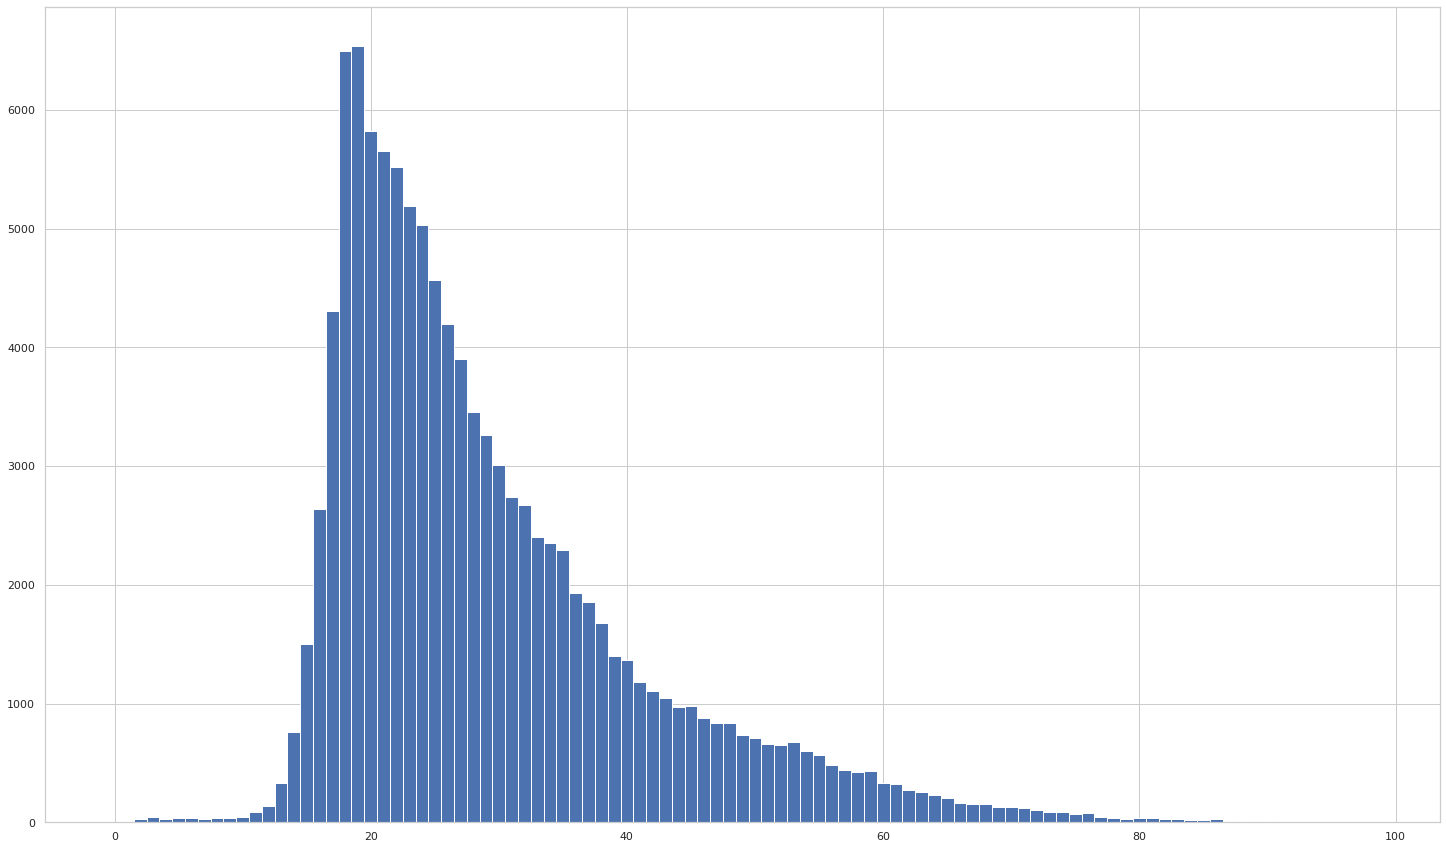

In [152]:
# Réalisation du graph avec les keys représentation les âges et les values représentant les fusillades

plt.figure(figsize=(25,15))
plt.bar(suspect_age_groups.keys(),suspect_age_groups.values(),width=1) 

#### Liste des âges des suspects les plus impiqués dans des fusillades

In [154]:
'''
Création de colonnes pour étudier la participation aux fusillades en fonction des genres ("Male","Female","Unknown")
Dans le même temps, gestion de la participation totale 
'''
df_panda["participant_gender"] = df_panda["participant_gender"].fillna("0::Unknown")

'''
Fonction similaire à la première mais retour sous un format différent (non contraint par le chart)
'''
def sanitizeColumnSimple(column) :                    
    genre = []               
    genre = str(column).split("||")    
    for i in genre :              
        genre_row = str(i).split("::")  
        if len(genre_row) > 1 :         
            genre.append(genre_row[1])    

    return genre

df_genre = df_panda.participant_gender.apply(sanitizeColumnSimple)
df_panda["total_participant"] = df_genre.apply(lambda x: len(x))
df_panda["male_participant"] = df_genre.apply(lambda i: i.count("Male"))
df_panda["female_participant"] = df_genre.apply(lambda i: i.count("Female"))
df_panda["unknown_participant"] = df_genre.apply(lambda i: i.count("Unknown"))

In [17]:
df_panda.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,participant_type_map,participant_age_map,total_participant,male_participant,female_participant,unknown_participant
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,"{0: 'Victim', 1: 'Victim', 2: 'Victim', 3: 'Vi...",{0: '20'},8,3,1,0
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,"{0: 'Victim', 1: 'Victim', 2: 'Victim', 3: 'Vi...",{0: '20'},2,1,0,0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,"{0: 'Subject-Suspect', 1: 'Subject-Suspect', 2...","{0: '25', 1: '31', 2: '33', 3: '34', 4: '33'}",10,5,0,0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,"{0: 'Victim', 1: 'Victim', 2: 'Victim', 3: 'Su...","{0: '29', 1: '33', 2: '56', 3: '33'}",8,3,1,0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-moth

#### Nous avons maintenant la participation en fonction du genre dans notre tableau

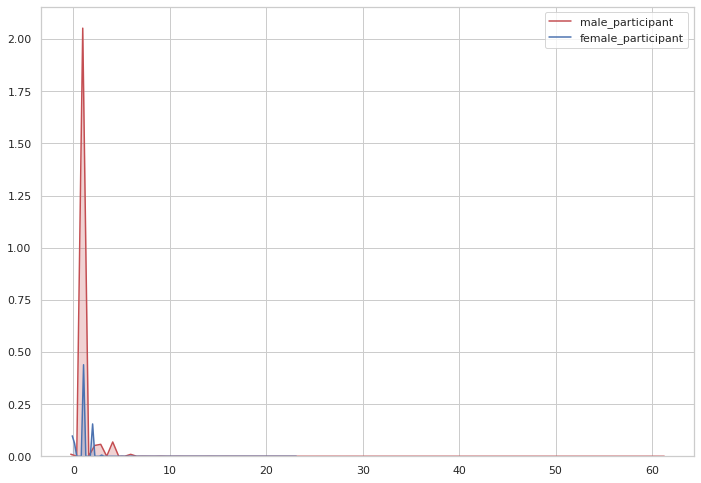

In [155]:
# Selection des participations en fontion des années
data_gender = df_panda[["total_participant", "male_participant", "female_participant"]].groupby(df_panda["year"]).sum()
plot_male=sb.kdeplot(df_panda['male_participant'], shade=True, color="r")
plot_female=sb.kdeplot(df_panda['female_participant'], shade=True, color="b")
del(data_gender) # Affichage des 2 courbes sur le même graph

#### Comparaison des fusillades pour les différents genres en fonction des années

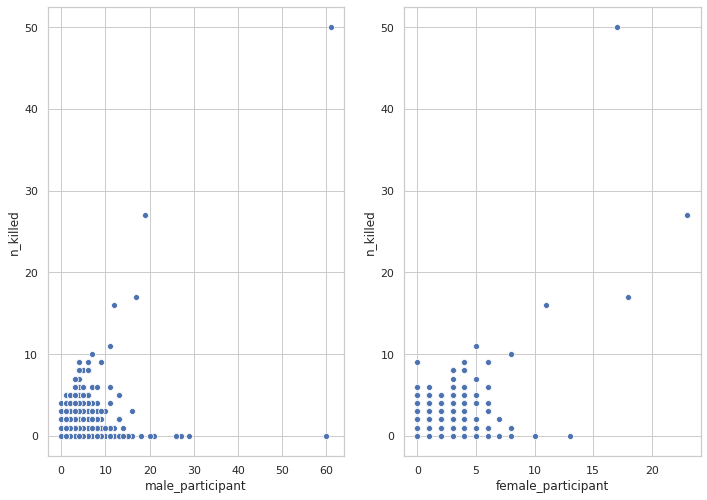

In [162]:
# Création d'un nuage de points pour les deux genres défini du dataset (Male et Female)
fig, axs = plt.subplots(ncols=2) # Affichage sous forme de colonne, comparaison
lotArea_salePric= sb.scatterplot(x='male_participant', y='n_killed', data= df_panda,ax=axs[0]) #Male
lotFrontage_lotArea = sb.scatterplot(x='female_participant', y='n_killed', data= df_panda, ax=axs[1]) #Female

#### Mort dans les fusillades en fonction du genre "Male" et "Female"

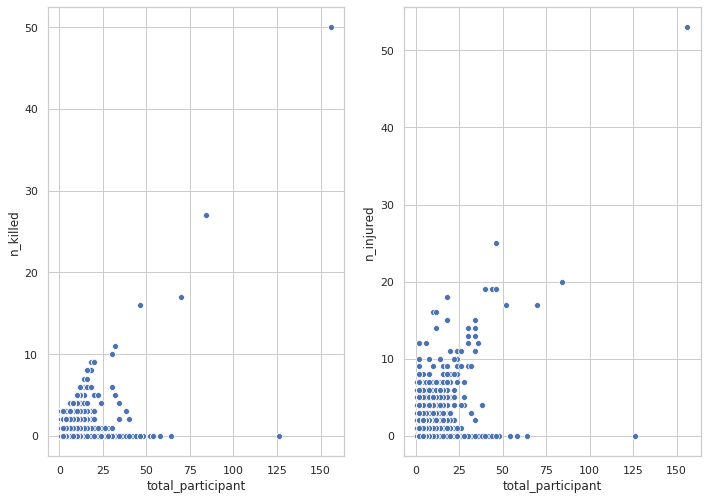

In [161]:
# Création par la même occasion d'un nuage de points pour les deux états des fusillades (tuées ou blessés)
fig, axs = plt.subplots(ncols=2) # Affichage sous forme de colonne pour la comparaison
lotArea_salePric= sb.scatterplot(x='total_participant', y='n_killed', data= df_panda,ax=axs[0]) #Nbre Tuées
lotFrontage_lotArea = sb.scatterplot(x='total_participant', y='n_injured', data= df_panda, ax=axs[1]) # Nbre Blessés

#### Nombre de morts et de blessés en fonction du nombre de participants

In [159]:
# Selection de nos données pour le dernier chart (Somme des data traitées, conclusion)
dataLastGrid = ['n_killed', 'n_injured','n_guns_involved','male_participant','female_participant']

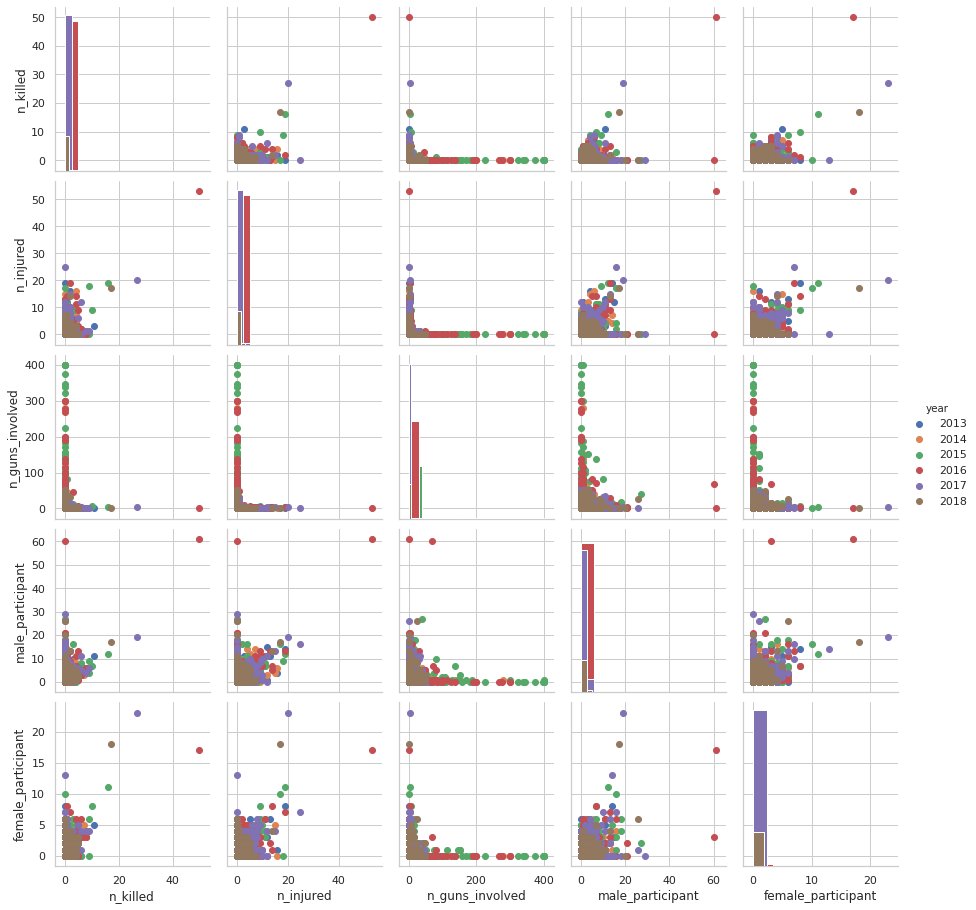

In [160]:
# Création d'un chart de mise en paralléle des datas en fonction des années
finalGrid1 = sb.PairGrid(df_panda,vars=dataLastGrid,hue='year')
finalGrid1 = finalGrid1.map_diag(plt.hist)                   
finalGrid1.map_offdiag(plt.scatter) # Affichage sous forme de nuage de points
finalGrid1.add_legend();

#### Comparaison et évolution de nos données au fil des années 

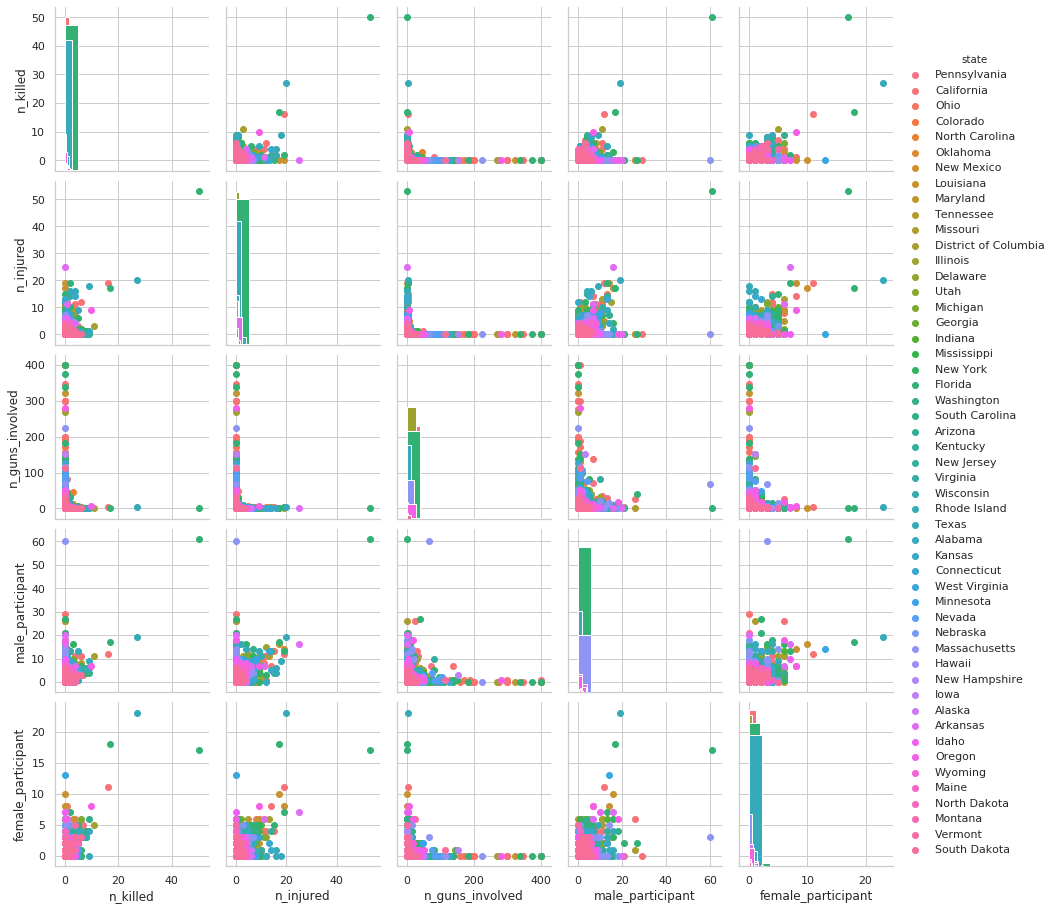

In [122]:
# Création d'un chart de mise en paralléle des datas en fonction des états
finalGrid1 = sb.PairGrid(df_panda,vars=dataLastGrid,hue='state')
finalGrid1 = finalGrid1.map_diag(plt.hist)                   
finalGrid1.map_offdiag(plt.scatter)# Affichage sous forme de nuage de point
finalGrid1.add_legend();

#### Comparaison et évolution de nos données en fonction de l'état